# Hoja de Trabajo 1

- Jimena Hernández - 21199
- Mark Albrand - 21004

## Ejercicio 2

𝑓(𝑥) = 𝑥 * 𝑠𝑖𝑛(10π𝑥) + 1, [0,1]

#### Mediante el uso de algoritmos genéticos, resuelva el siguiente ejercicio. Implemente un algoritmo genético en Python para encontrar el valor máximo de la función f(x) = x * sin(10 πx) + 1

In [55]:
import numpy as np

def objetivo(x):
    '''Función objetivo a minimizar'''
    return x * np.sin(10 * np.pi * x) + 1.0

def poblacion_inicial(size, min, max):  # 0 y 1 son los límites inferior y superior de la función objetivo
    '''Genera una población inicial de n individuos'''
    return np.random.uniform(min, max, size)

def evaluar_aptitud(poblacion):
    '''Evalúa la aptitud de una población de individuos'''
    return objetivo(poblacion)

def seleccion(poblacion, aptitud, n):
    '''Selecciona n individuos de la población mediante torneo binario'''
    seleccionados = np.zeros(n)
    for i in range(n):
        # Se recorre la población
        idx = np.random.randint(0, len(poblacion), 2) # Selecciona dos individuos al azar
        if aptitud[idx[0]] > aptitud[idx[1]]:  # Selección por torneo binario
            seleccionados[i] = poblacion[idx[0]]
        else:
            seleccionados[i] = poblacion[idx[1]]
    return seleccionados

def cruce(padres, pc):
    '''Cruza los padres mediante cruce aritmético'''
    hijos = np.zeros(len(padres))
    for i in range(0, len(padres) - 1, 2):
        if np.random.rand() < pc:
            hijos[i] = 0.5 * (padres[i] + padres[i + 1])
            hijos[i + 1] = 0.5 * (padres[i] + padres[i + 1])
        else:
            hijos[i] = padres[i]
            hijos[i + 1] = padres[i + 1]
    if len(padres) % 2 == 1:
        hijos[-1] = padres[-1]
    return hijos

def mutacion(hijos, pm, min, max):
    '''Aplica una mutación uniforme a los hijos'''
    for i in range(len(hijos)):
        if np.random.rand() < pm:
            hijos[i] = np.random.uniform(min, max)
    return hijos

def reemplazo(poblacion, hijos):
    '''Reemplaza por nueva población reemplazando algunos individuos antiguos por otros nuevos generados por cruce y mutación '''
    nueva_poblacion = np.concatenate((poblacion, hijos))
    nueva_aptitud = evaluar_aptitud(nueva_poblacion)
    idx = np.argsort(-nueva_aptitud)
    return nueva_poblacion[idx[:len(poblacion)]]

def algoritmo_genetico(size, min, max, generaciones, pc, pm):
    '''Algoritmo genético para optimización de funciones'''
    poblacion = poblacion_inicial(size, min, max)
    mejores = [] # Guardar el mejor individuo de cada generación

    for _ in range(generaciones):
        aptitud = evaluar_aptitud(poblacion)
        padres = seleccion(poblacion, aptitud, size)
        hijos = cruce(padres, pc)
        hijos = mutacion(hijos, pm, min, max)
        poblacion = reemplazo(poblacion, hijos)
        aptitud = evaluar_aptitud(poblacion)  # Recalcular la aptitud después del reemplazo
        mejores.append(np.max(aptitud))

    return poblacion, mejores

In [58]:
size = 20 # Tamaño de la población
min_val = 0.0 # Límite inferior del dominio
max_val = 1.0 # Límite superior del dominio
generaciones = 100 # Número de generaciones
pc = 0.8 # Probabilidad de cruce
pm = 0.1 # Probabilidad de mutación

# Ejecutar el algoritmo genético
poblacion_final, mejores = algoritmo_genetico(size, min_val, max_val, generaciones, pc, pm)


print(f"Mejor solución: {poblacion_final[np.argmax(evaluar_aptitud(poblacion_final))]}")
print(f"Mejor aptitud: {np.max(evaluar_aptitud(poblacion_final))}")

Mejor solución: 0.8505722721199561
Mejor aptitud: 1.8504348127181602


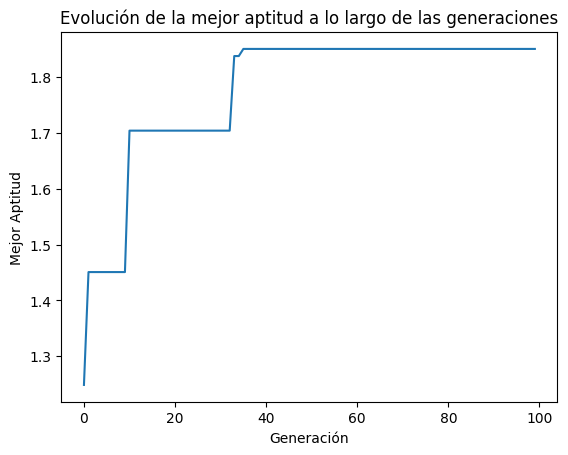

In [59]:
# Visualización de la evolución de la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(mejores)
plt.xlabel('Generación')
plt.ylabel('Mejor Aptitud')
plt.title('Evolución de la mejor aptitud a lo largo de las generaciones')
plt.show()